In [53]:
# SVR Analysis for Laptop Prices
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import joblib

In [54]:
# Load the dataset using pandas with the correct encoding
df = pd.read_csv(r'./laptop_price.csv', encoding='ISO-8859-1')


In [55]:

# Inspect the DataFrame
print(df.columns)

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')


In [56]:
# Prepare the data
# Separate features and target
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

In [57]:

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


In [58]:
# Create a preprocessing pipeline for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [59]:
# Create a preprocessing pipeline for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [60]:

# Combine both preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [61]:
# Create a pipeline that includes preprocessing and the model
svr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))
])

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Train the model
svr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['laptop_ID', 'Inches'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object'))])),
                ('regressor', SVR(C=100, gamma=0.1))])

In [64]:
# Predict the prices
y_pred = svr_model.predict(X_test)

In [65]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 243.0687879146567
Mean Squared Error (MSE): 252514.45095266134
Root Mean Squared Error (RMSE): 502.5081600856461
R-squared (R²): 0.5028524035668942


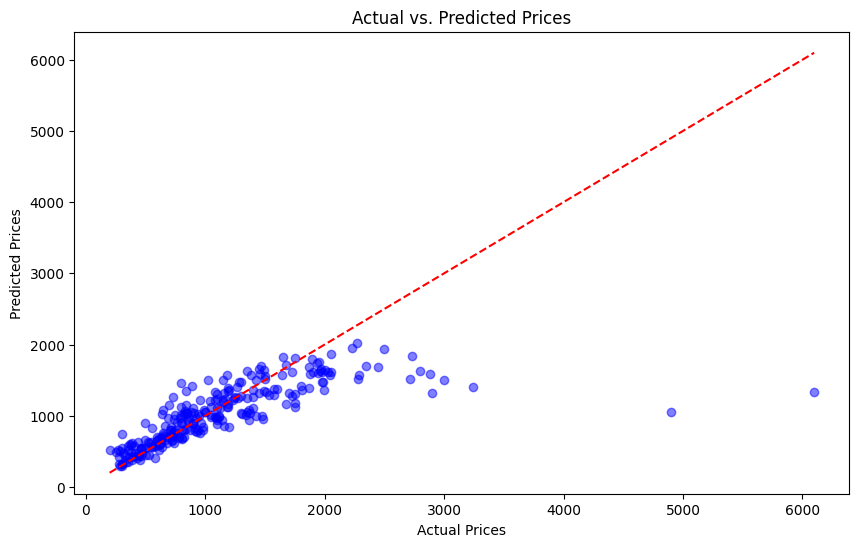

In [66]:

# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

In [67]:
# Model Deployment (Save the model)
joblib.dump(svr_model, 'svr_model.pkl')


['svr_model.pkl']

In [8]:
import joblib
import pandas as pd

# Load the model
loaded_model = joblib.load('svr_model.pkl')

# Example new data - replace these values with actual data
# Including all features used during model training
new_data = pd.DataFrame({
    'Inches': [15.6], 
    'Weight': [2.5], 
    'Ram': [8],
    'Gpu': ['Intel'],  # Add a realistic value
    'Memory': ['256GB SSD'],  # Add a realistic value
    'ScreenResolution': ['1920x1080'],  # Add a realistic value
    'OpSys': ['Windows 10'],  # Add a realistic value
    'Company': ['HP'],  # Add a realistic value
    'laptop_ID': [999],  # Add a realistic value
    'Product': ['Laptop Model'],  # Add a realistic value
    'Cpu': ['Intel Core i5'],  # Add a realistic value
    'TypeName': ['Ultrabook']  # Add a realistic value
})

# Apply the same preprocessing to the new data
preprocessor = loaded_model.named_steps['preprocessor']
new_data_preprocessed = preprocessor.transform(new_data)

# Make prediction
prediction = loaded_model.named_steps['regressor'].predict(new_data_preprocessed)
print("Predicted Price:", prediction)


Predicted Price: [1415.23739365]


In [9]:

# Make predictions
predictions = loaded_model.predict(new_data)

print(predictions)

[1415.23739365]
